<a href="https://colab.research.google.com/github/zkzkzk1/ds4ph-bme/blob/master/Homework8Prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
[x_train.shape,y_train.shape,x_test.shape,y_test.shape]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

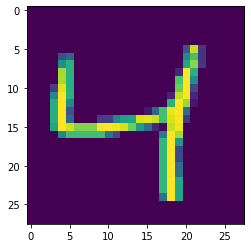

In [0]:
plt.imshow(x_train[2,:,:])

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [0]:
predictions = model(x_train[:1]).numpy()
predictions # takes model and runs specific image through it

array([[ 0.12164237,  0.4562467 , -0.05598387, -0.32098052,  0.00265805,
         0.46521163,  0.17112409, -0.00489836, -0.01827879, -0.00142905]],
      dtype=float32)

In [0]:
tf.nn.softmax(predictions).numpy() # converts inputs to softmax

array([[0.10141703, 0.14171888, 0.08491195, 0.06514516, 0.09004024,
        0.14299509, 0.10656155, 0.08936243, 0.08817468, 0.08967298]],
      dtype=float32)

In [0]:
# Solve for gradients using optimization function
# loss function is negative log likelihood function
# minimize the neg. log likelihood
# network defines method for feedforward, solve for weights with back, loss function is how close probabilityes observed to what they truly are
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


1.944945

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4315 - accuracy: 0.8721
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2031 - accuracy: 0.9442
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1551 - accuracy: 0.9570
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1382 - accuracy: 0.9619
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1142 - accuracy: 0.9676


In [0]:
model.evaluate(x_test,  y_test, verbose=2) # this model has 97% accuracy

313/313 - 0s - loss: 0.0976 - accuracy: 0.9716


[0.09756526350975037, 0.9715999960899353]

In [0]:
# now compare to new model

In [0]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [0]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
predictions2 = model2(x_train[:1]).numpy()
predictions2 # takes model and runs specific image through it

array([[ 1.1113867 ,  0.12491848,  0.1273783 ,  0.2853855 ,  0.41764307,
         0.31347924,  0.07245158, -0.061063  ,  0.2428364 , -0.51405966]],
      dtype=float32)

In [0]:
tf.nn.softmax(predictions2).numpy() # converts inputs to softmax

array([[0.2265369 , 0.08447365, 0.0846817 , 0.09917706, 0.11320092,
        0.10200281, 0.08015584, 0.07013754, 0.09504568, 0.04458785]],
      dtype=float32)

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions2).numpy()

2.282755

In [0]:
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [0]:
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4658 - accuracy: 0.8635
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.9176
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2379 - accuracy: 0.9280
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2129 - accuracy: 0.9352
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1988 - accuracy: 0.9391


In [0]:
model2.evaluate(x_test,  y_test, verbose=2) # this new model has 96% accuracy, this has less accuracy with the network with more hidden layers

313/313 - 0s - loss: 0.1351 - accuracy: 0.9589


[0.13508257269859314, 0.958899974822998]